## Sustitución usando una etiqueta adicional en variables categóricas

Este es el método de sustitución más común en variables categóricas. Este método considera los valores faltantes como una categoría o etiqueta adicional de la variable, por lo tanto todas las observaciones con valores ausentes son agrupadas con esta nueva etiqueta 'faltante' o 'missing' en inglés.

En esencia, es equivalente a la sustitución por valores arbitrarios en varaibles numéricas.

Una ventaja de esta técnica es que no asume nada sobre los datos ausentes y es apropaida cuando el número de valores faltantes es alto.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la'ausencia' (si existe)
- No asume nada acerca de los valores ausentes


### Limitaciones

- Si el número de NA es bajo, crear una categoría adicional puede causar sobre-ajustes en los árboles de decisión 

Este es un método bastante utilizado en competencias de ciencia de datos y organizaciones. Por ejemplo, la solución ganadora de la comptencia  KDD 2009 : "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

### En este demo:

Vamos a aprender como implementar la sustición por la moda usando pandas y los datos Ames House Price 

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### House Prices dataset

In [3]:
# carguemos datos con unas columnas

# estas son las columnas categóricas y la variable target SalePrice (precio de venta)
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [4]:
# evaluemos el porcentaje de valores nulos por cada una de las variables

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

Cuando reemplazamos los valores nulos NA en la variables categóricas por una etiqueta 'Missing', en principio no hay ninguna diferencia si hacemos la sustitución antes o despues de separar los datos en segmentos para training and prueba. Sin embargo, no recomendamos esto en práctica. Más adelante veremos en los notebooks que es mejor adherirse a esta premisa en la práctica y separar los datos en segmentos de entrenamiento y prueba al comienzo del machine learning pipeline. Por lo tanto seguiremos con esta práctica en este demo.

In [5]:
# separar datos en segmentos entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [6]:
# % de valores ausentes
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Número de casas')

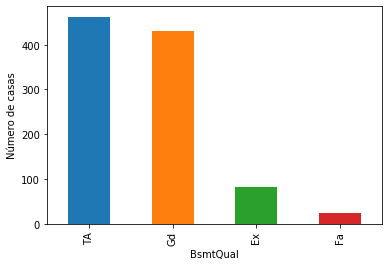

In [7]:
# exploremos el número de observaciones por categoría en BsmtQual

# usamos esta línea de codigo en la sección 3 variable characteristics

# value_counts() cuenta el numero de casas que muestra cada una de las etiquetas
# en las variables indicadas aqui


X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Número de casas')

In [8]:
# reemplacemos NA en los segmentos de prueba y entrenamiento

# usemos el método fillna() de pandas

# con el argumento inplace=True, indicándole a pandas
# que queremos reemplazar los valores en los datos

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

/Users/natisangarita/python/courses/feml/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Text(0, 0.5, 'Number of houses')

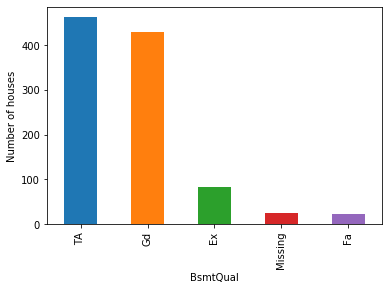

In [9]:
# reemplacemos el número de casas por categoriá en la variables que sustituimos
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Podemos ver la nueva categoria : Missing

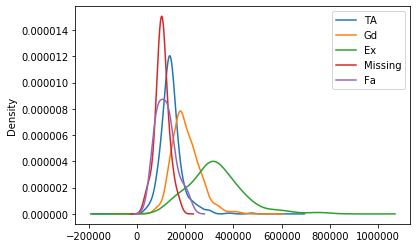

In [10]:
# grafiquemos la distribución del target (SalePrice -precio de venta)
# para las casas que tienen las diferentes categorias en la variable BsmtQual

fig = plt.figure()
ax = fig.add_subplot(111)

# gráfica por categoria
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# leyenda
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

You can see that the houses with different labels show different distributions of Prices. For example the houses with the label Ex tend to be the most expensive, whereas the houses that show Missing or Fa are the cheapest.

#### FirePlaceQu

In [11]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

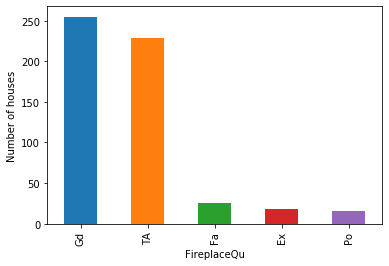

In [12]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [13]:
# reemplacemos NA en los segmentos de prueba y entrenamiento
# con una nueva categoría 'Missing'

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Número de casas')

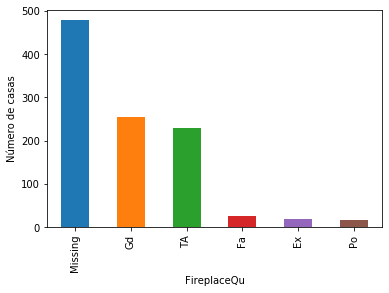

In [14]:
# evaluemos el efecto de este cambio en la distribución de 
# la variable sustituida

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Número de casas')

Vemos la categoría adicional para los valores ausentes: Missing

Esta etiqueta contiene la mayoría de las casas, que tenian valores ausentes en la variable FireplaceQu .

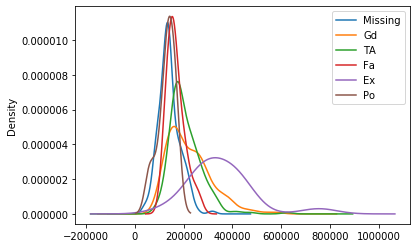

In [15]:
# grafiquemos la distribución del target (SalePrice -precio de venta)
# para diferentes categorias de la variable FireplaceQu

fig = plt.figure()
ax = fig.add_subplot(111)

# una gráfica por categoría
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)


# leyendas
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

Observemos nuevamente las casas y las diferentes categorías para la variable FireplaceQu. Podemos ver que las casas tienen diferentes distribuciones para el target SalePrice: las casas con la etiqueta Ex son las mas costosas asi como las de la categoría Missing, las casas con la categoria Fa son las más baratas.

**Esto es todo por este demo. En las siguientes secciones estudiaremos como automatizar este proceso usando scikit-learn y feature engine como parte de machine learning pipeline.**


In [16]:
# BONUS: en caso que necesites graficar las diferentes distribuciones
# esta es una forma de hacerlo de forma general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

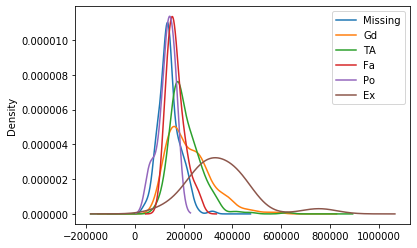

In [17]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

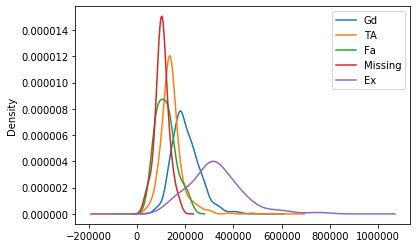

In [18]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')